## Estimator Transformer and  Column selector

In [4]:
import numpy as np
import pandas as pd

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error

from sklego.meta import EstimatorTransformer
from sklego.preprocessing import ColumnSelector


import seaborn as sns

In [108]:
np.random.seed(1)
n = 1000 
X = np.random.uniform(0, 1, (n, 2))

# y = x_0 + 2*x1 + random_number
y = X[:, 0] + 2 * X[:, 1]  + np.random.uniform(0, 1, (n,))

df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
df.head(10)

,x1,x2,y
0,0.417022,0.720324,2.434649
1,0.000114,0.302333,1.480168
2,0.146756,0.092339,0.939999
3,0.186260,0.345561,1.129041
4,0.396767,0.538817,1.770531
5,0.419195,0.685220,2.322556
6,0.204452,0.878117,2.922765
7,0.027388,0.670468,1.552818
8,0.417305,0.558690,2.044583
9,0.140387,0.198101,0.880378


<AxesSubplot:>

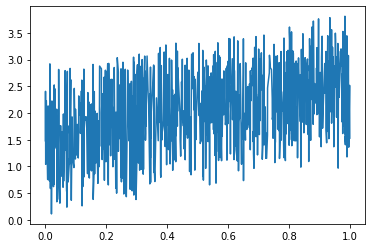

In [40]:
sns.lineplot(x=df.values[:, 0], y=y)

In [85]:
ct = ColumnTransformer(
    [('model_1', EstimatorTransformer(LinearRegression()), ['x1', 'x2']),
    ('model_2', EstimatorTransformer(Ridge()), ['x1', 'x2'])]
)
ct.fit_transform(df, y)

array([[2.35377617, 2.34997191],
       [1.06778524, 1.07892273],
       [0.77966619, 0.79405148],
       ...,
       [2.16940325, 2.16755855],
       [2.34450535, 2.34090439],
       [2.43529861, 2.43071865]])

In [76]:
pipeline = Pipeline([
    ("grab_columns", ColumnSelector(['x1', 'x2'])),
    ("ml_features", FeatureUnion([
        ("model_1", EstimatorTransformer(LinearRegression())),
        ("model_2", EstimatorTransformer(Ridge()))
    ]))
])

predictions = pipeline.fit(df, y).transform(df)
predictions

array([[2.35377617, 2.34997191],
       [1.06778524, 1.07892273],
       [0.77966619, 0.79405148],
       ...,
       [2.16940325, 2.16755855],
       [2.34450535, 2.34090439],
       [2.43529861, 2.43071865]])

In [ ]:
pipeline = Pipeline([
    ("grab_columns", ColumnSelector(['x1', 'x2'])),
    ("min_max")
    ("ml_features", FeatureUnion([
        ("model_1", EstimatorTransformer(LinearRegression())),
        ("model_2", EstimatorTransformer(Ridge()))
    ]))
])

predictions = pipeline.fit(df, y).transform(df)
predictions

## Keep the original features

In [103]:
from sklego.preprocessing import IdentityTransformer
from sklearn.preprocessing import MinMaxScale

In [111]:
IdentityTransformer().fit_transform(np.array([[1,2],[3,4]]))

array([[1, 2],
       [3, 4]])

In [114]:
MinMaxScaler().fit_transform(X)

array([[0.41757319, 0.72125566],
       [0.        , 0.30227879],
       [0.14687562, 0.09178999],
       ...,
       [0.79764583, 0.44779645],
       [0.18430694, 0.82991946],
       [0.03093289, 0.94819292]])

In [113]:
pipe = Pipeline([
    ("split", FeatureUnion([
        ("orig", IdentityTransformer()),
        ("minmax", MinMaxScaler())
    ]))
])

X_new = pipe.fit_transform(X)
X_new

array([[4.17022005e-01, 7.20324493e-01, 4.17573186e-01, 7.21255655e-01],
       [1.14374817e-04, 3.02332573e-01, 0.00000000e+00, 3.02278792e-01],
       [1.46755891e-01, 9.23385948e-02, 1.46875616e-01, 9.17899917e-02],
       ...,
       [7.96488867e-01, 4.47508139e-01, 7.97645834e-01, 4.47796445e-01],
       [1.84127556e-01, 8.28732852e-01, 1.84306942e-01, 8.29919463e-01],
       [3.09979598e-02, 9.46728270e-01, 3.09328879e-02, 9.48192922e-01]])